## Find the best place for a new Döner Kebab restaurant in Berlin (Germany)

**Some background information about Döner Kebab in Germany:**

Doner kebab (Turkish; "(spinning) grilled meat"), or kebab for short, is one of the most famous dishes in Turkish cuisine. It is similar to the Greek gyros. It consists of slices of meat seasoned with marinade, which are placed in layers on a vertical rotating spit and grilled on the side. The outer, browned layers are then gradually cut off. 

In the early 1970s, the Federal Republic of Germany began to offer the meat cut from the roast cone not only on a plate with side dishes, but alternatively in a dumpling and thus also for takeaway. It is unclear when the first German kebab snack bar opened. According to legend, it was in the early 1970s in Berlin on Kottbusser Damm.

While the döner kebab was initially staged with folkloric elements in order to cater to the exoticism of German guests, the 1990s saw a clear transformation of the döner snack to the US-influenced global fast food culture.

The common variant of the doner kebab in pita bread in German-speaking countries differs from the Turkish one mainly by the addition of garden lettuce, sliced tomatoes, cucumbers and onions, white and red cabbage and by the sauces used with mayonnaise and yogurt, for example in the variants "garlic", "herbs", "hot" and "curry", which do not belong to the traditional Turkish cuisine.

see here: https://de.wikipedia.org/wiki/D%C3%B6ner_Kebab#Verbreitung_im_deutschsprachigen_Raum

Import required libraries:

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import folium # map rendering library
from bs4 import BeautifulSoup
print('Libraries imported.')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Libraries imported.


Crawl the table data with BeautifulSoup & write the needed information in a pandas Dataframe:

In [2]:
# parse data from the html into a beautifulsoup object
r = requests.get('https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins')
soup = BeautifulSoup(r.text, 'html.parser')

table_contents=[]
table=soup.find('table',{'class':"wikitable"})

In [3]:
df_berlin = pd.read_html(str(table))
# convert list to dataframe
df_berlin = pd.DataFrame(df_berlin[0])
df_berlin.head()

,Nr.,Bezirk,Ortsteile,Flächein km²,Einwohner[2](31. Dezember 2020),Einwohnerpro km²(31. Dezember 2020),Bezirks­bürger­meister[3],Karte
0,1,Mitte,0101 Mitte0102 Moabit0103 Hansaviertel0104 Tie...,3947,383.360,9.713,Stephan von Dassel (Grüne),Lage
1,2,Friedrichshain-Kreuzberg,0201 Friedrichshain0202 Kreuzberg,2016,289.787,14.374,Monika Herrmann (Grüne),Lage
2,3,Pankow,0301 Prenzlauer Berg0302 Weißensee0303 Blanken...,10301,410.716,3.987,Sören Benn (Die Linke),Lage
3,4,Charlottenburg-Wilmersdorf,0401 Charlottenburg0402 Wilmersdorf0403 Schmar...,6472,341.392,5.275,Reinhard Naumann (SPD),Lage
4,5,Spandau,0501 Spandau0502 Haselhorst0503 Siemensstadt05...,9191,245.527,2.671,Helmut Kleebank (SPD),Lage


In [4]:
df_berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
Nr.                                    12 non-null int64
Bezirk                                 12 non-null object
Ortsteile                              12 non-null object
Flächein km²                           12 non-null int64
Einwohner[2](31. Dezember 2020)        12 non-null float64
Einwohnerpro km²(31. Dezember 2020)    12 non-null float64
Bezirks­bürger­meister[3]              12 non-null object
Karte                                  12 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 848.0+ bytes


In [5]:
df_berlin.drop(["Nr.", "Bezirks­bürger­meister[3]", "Karte"], axis=1, inplace = True)

In [6]:
df_berlin.head()

,Bezirk,Ortsteile,Flächein km²,Einwohner[2](31. Dezember 2020),Einwohnerpro km²(31. Dezember 2020)
0,Mitte,0101 Mitte0102 Moabit0103 Hansaviertel0104 Tie...,3947,383.360,9.713
1,Friedrichshain-Kreuzberg,0201 Friedrichshain0202 Kreuzberg,2016,289.787,14.374
2,Pankow,0301 Prenzlauer Berg0302 Weißensee0303 Blanken...,10301,410.716,3.987
3,Charlottenburg-Wilmersdorf,0401 Charlottenburg0402 Wilmersdorf0403 Schmar...,6472,341.392,5.275
4,Spandau,0501 Spandau0502 Haselhorst0503 Siemensstadt05...,9191,245.527,2.671


In [7]:
df_berlin.shape

(12, 5)

In [10]:
import re


table_contents = []

borough_neighborhoods = []
borough = []
area = []
citizens = []
citizens_area = []

for row in range(0,df_berlin.shape[0]):
    
    bezirk = df_berlin.iloc[row,0]
    fläche = df_berlin.iloc[row,2]
    einwohner = df_berlin.iloc[row,3]
    einwohner_fläche = df_berlin.iloc[row,4]
    neighborhoods_list = df_berlin["Ortsteile"].iloc[row]
    neighborhoods = re.split('(\d+)',neighborhoods_list)
    neighborhoods.pop(0)
    neighborhoods = [x.strip(' ') for x in neighborhoods]
    borough_neighborhoods.extend(neighborhoods)
    borough.extend(bezirk for i in range(int(len(neighborhoods)/2)))
    area.extend(fläche for i in range(int(len(neighborhoods)/2)))
    citizens.extend(einwohner for i in range(int(len(neighborhoods)/2)))
    citizens_area.extend(einwohner_fläche for i in range(int(len(neighborhoods)/2)))
    #test = df_berlin.iloc[row,0]
    #print(test)
    
    
    
postalcode = []
neigborhood = []

for i in range(0,len(borough_neighborhoods),2):
    plz = borough_neighborhoods[i]
    postalcode.append(plz)
    nb = borough_neighborhoods[i+1]
    neigborhood.append(nb)
    
print(len(postalcode))
print(len(neigborhood))
print(len(borough))

print(postalcode)
print(neigborhood)
print(borough)

97
97
97
['0101', '0102', '0103', '0104', '0105', '0106', '0201', '0202', '0301', '0302', '0303', '0304', '0305', '0306', '0307', '0308', '0309', '0310', '0311', '0312', '0313', '0401', '0402', '0403', '0404', '0405', '0406', '0407', '0501', '0502', '0503', '0504', '0505', '0506', '0507', '0508', '0509', '0601', '0602', '0603', '0604', '0605', '0606', '0607', '0608', '0701', '0702', '0703', '0704', '0705', '0706', '0801', '0802', '0803', '0804', '0805', '0901', '0902', '0903', '0904', '0905', '0906', '0907', '0908', '0909', '0910', '0911', '0912', '0913', '0914', '0915', '1001', '1002', '1003', '1004', '1005', '1101', '1102', '1103', '1104', '1106', '1107', '1109', '1110', '1111', '1112', '1201', '1202', '1203', '1204', '1205', '1206', '1207', '1208', '1209', '1210', '1211']
['Mitte', 'Moabit', 'Hansaviertel', 'Tiergarten', 'Wedding', 'Gesundbrunnen', 'Friedrichshain', 'Kreuzberg', 'Prenzlauer Berg', 'Weißensee', 'Blankenburg', 'Heinersdorf', 'Karow', '\xa0Stadtrandsiedlung\xa0Malchow'

In [11]:
df = pd.DataFrame(columns = ["Borough", "Neighborhood", "PostalCode"])
df["Borough"] = borough
df["Neighborhood"] = neigborhood
df["PostalCode"] = postalcode
df["Population_per_sqare_kilometer"] = citizens_area
df

,Borough,Neighborhood,PostalCode,Population_per_sqare_kilometer
0,Mitte,Mitte,0101,9.713
1,Mitte,Moabit,0102,9.713
2,Mitte,Hansaviertel,0103,9.713
3,Mitte,Tiergarten,0104,9.713
4,Mitte,Wedding,0105,9.713
5,Mitte,Gesundbrunnen,0106,9.713
6,Friedrichshain-Kreuzberg,Friedrichshain,0201,14.374
7,Friedrichshain-Kreuzberg,Kreuzberg,0202,14.374
8,Pankow,Prenzlauer Berg,0301,3.987
9,Pankow,Weißensee,0302,3.987


In [12]:
df.shape

(97, 4)

Use geopy library to get the latitude and longitude values of Toronto.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent to_explorer, as shown below:

In [13]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
lat = []
long = []
for neigborhood in df["Neighborhood"]:
    address = 'Berlin + {}'.format(neigborhood)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    long.append(longitude)
    print('The geograpical coordinate of Berlin {} are {}, {}.'.format(neigborhood, latitude, longitude))
    
print(len(lat))
print(len(long))

The geograpical coordinate of Berlin Mitte are 52.53321645, 13.359795660679708.
The geograpical coordinate of Berlin Moabit are 52.5346789, 13.3344781.
The geograpical coordinate of Berlin Hansaviertel are 52.5191234, 13.3418725.
The geograpical coordinate of Berlin Tiergarten are 52.5143746, 13.3364504.
The geograpical coordinate of Berlin Wedding are 52.550123, 13.34197.
The geograpical coordinate of Berlin Gesundbrunnen are 52.5486453, 13.3902169.
The geograpical coordinate of Berlin Friedrichshain are 52.5122154, 13.4502904.
The geograpical coordinate of Berlin Kreuzberg are 52.4976443, 13.411914.
The geograpical coordinate of Berlin Prenzlauer Berg are 52.5398466, 13.4285652.
The geograpical coordinate of Berlin Weißensee are 52.5546193, 13.4630018.
The geograpical coordinate of Berlin Blankenburg are 52.5933808, 13.4459406.
The geograpical coordinate of Berlin Heinersdorf are 52.5728248, 13.4370149.
The geograpical coordinate of Berlin Karow are 52.6175864, 13.472253.
The geograp

In [14]:
df["Latitude"] = lat
df["Longitude"] = long
df

,Borough,Neighborhood,PostalCode,Population_per_sqare_kilometer,Latitude,Longitude
0,Mitte,Mitte,0101,9.713,52.533216,13.359796
1,Mitte,Moabit,0102,9.713,52.534679,13.334478
2,Mitte,Hansaviertel,0103,9.713,52.519123,13.341872
3,Mitte,Tiergarten,0104,9.713,52.514375,13.336450
4,Mitte,Wedding,0105,9.713,52.550123,13.341970
5,Mitte,Gesundbrunnen,0106,9.713,52.548645,13.390217
6,Friedrichshain-Kreuzberg,Friedrichshain,0201,14.374,52.512215,13.450290
7,Friedrichshain-Kreuzberg,Kreuzberg,0202,14.374,52.497644,13.411914
8,Pankow,Prenzlauer Berg,0301,3.987,52.539847,13.428565
9,Pankow,Weißensee,0302,3.987,52.554619,13.463002


Load data for the average income in Berlin boroughs and merge with the Dataframe df:

In [23]:
df_income = pd.read_csv("Berlin_Income.csv", delimiter = ";")
df_income.head()

,Borough,< 900 € [%],900 - 1300 € [%],1300 - 1500 € [%],1500 - 2000 € [%],2000 - 2600 € [%],2600 - 3200 € [%],3200 € and more [%],Average monthly income in €
0,Mitte,10.37,15.74,6.68,16.79,14.90,11.16,24.26,2025
1,Friedrichshain-Kreuzberg,11.14,14.08,6.89,15.76,15.16,9.89,27.02,2075
2,Pankow,4.44,10.45,5.09,14.58,16.86,14.32,34.21,2550
3,Charlottenburg-Wilmersdorf,9.33,13.14,5.31,15.36,13.45,10.36,32.84,2250
4,Spandau,8.27,11.88,8.60,19.41,17.20,10.57,23.91,2050


In [25]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
Borough                        12 non-null object
< 900 € [%]                    12 non-null float64
900 - 1300 € [%]               12 non-null float64
1300 - 1500 € [%]              12 non-null float64
1500 - 2000 € [%]              12 non-null float64
2000 - 2600 € [%]              12 non-null float64
2600 - 3200 € [%]              12 non-null float64
3200 € and more [%]            12 non-null float64
Average monthly income in €    12 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 944.0+ bytes


In [29]:
df_income = df_income[['Borough', 'Average monthly income in €']]

In [69]:
df = df.join(df_income.set_index('Borough'), on='Borough')
df.head(10)

,Borough,Neighborhood,PostalCode,Population_per_sqare_kilometer,Latitude,Longitude,Average monthly income in €
0,Mitte,Mitte,0101,9.713,52.533216,13.359796,2025
1,Mitte,Moabit,0102,9.713,52.534679,13.334478,2025
2,Mitte,Hansaviertel,0103,9.713,52.519123,13.341872,2025
3,Mitte,Tiergarten,0104,9.713,52.514375,13.336450,2025
4,Mitte,Wedding,0105,9.713,52.550123,13.341970,2025
5,Mitte,Gesundbrunnen,0106,9.713,52.548645,13.390217,2025
6,Friedrichshain-Kreuzberg,Friedrichshain,0201,14.374,52.512215,13.450290,2075
7,Friedrichshain-Kreuzberg,Kreuzberg,0202,14.374,52.497644,13.411914,2075
8,Pankow,Prenzlauer Berg,0301,3.987,52.539847,13.428565,2550
9,Pankow,Weißensee,0302,3.987,52.554619,13.463002,2550


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
Borough                           97 non-null object
Neighborhood                      97 non-null object
PostalCode                        97 non-null object
Population_per_sqare_kilometer    97 non-null float64
Latitude                          97 non-null float64
Longitude                         97 non-null float64
Average monthly income in €       97 non-null int64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.4+ KB


## Clustering neighborhoods by culinary offerings

In [32]:
from sklearn.cluster import KMeans

In [33]:
address = 'Berlin'

geolocator = Nominatim(user_agent="ber_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


#### Create a map of Berlin with neighborhoods superimposed on top.

In [34]:
# create map of Berlin using latitude and longitude values
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

Define Foursquare Credentials and Version:

In [35]:
CLIENT_ID = '03BSXD5REJLA23M1Y0UQBJ11GOWT4TSO31CTYMGF4HKDYD0A' # your Foursquare ID
CLIENT_SECRET = 'RGYUA0OUJVXF1SZJZ1P3EBHZIK4NVW2KSQEG1W4DVPNJG3XG' # your Foursquare Secret
ACCESS_TOKEN = '1DF25BRZ2IA3AYXEJ1HLP00KULYGM3OUEGFJMBIXMRIJKZQN' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30

### Let's explore the first neighborhood in our dataframe.

In [36]:
df.loc[0, 'Neighborhood']

'Mitte'

Get the neighborhood's latitude and longitude values.

In [37]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of Berlin {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Berlin Mitte are 52.53321645, 13.359795660679708.


Now, let's get the top 100 venues that are in Berlin Mitte within a radius of 500 meters.

In [38]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, ACCESS_TOKEN, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=03BSXD5REJLA23M1Y0UQBJ11GOWT4TSO31CTYMGF4HKDYD0A&client_secret=RGYUA0OUJVXF1SZJZ1P3EBHZIK4NVW2KSQEG1W4DVPNJG3XG&ll=52.53321645,13.359795660679708&oauth_token=1DF25BRZ2IA3AYXEJ1HLP00KULYGM3OUEGFJMBIXMRIJKZQN&v=20180604&radius=500&limit=100'

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '610ab0b1cb587432685a0527'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Turmstraße',
  'headerFullLocation': 'Turmstraße, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 52.5377164545, 'lng': 13.367179504517326},
   'sw': {'lat': 52.528716445499995, 'lng': 13.35241181684209}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f26e3d5e4b006e5c491448a',
       'name': 'Filmrauschpalast',
       'location': {'address': 'Lehrter Str. 35',
        'lat': 52.53429829821408,
        'lng': 13.359632364945671

From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [40]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Filmrauschpalast,Indie Movie Theater,52.534298,13.359632
1,Kulturfabrik Moabit,General Entertainment,52.534243,13.359332
2,Kapitel 21,Bar,52.534227,13.358959
3,Netto Marken-Discount,Supermarket,52.532283,13.360059
4,Poststadion,Soccer Stadium,52.529586,13.360495
5,REWE,Supermarket,52.532374,13.366118
6,Restaurant MEDITERRANEO,Mediterranean Restaurant,52.533400,13.359633
7,Coriander. Orientalische Küche. Falafelgroßver...,Falafel Restaurant,52.535523,13.356710
8,Polizeidirektion 3 Sportgelände,Gym,52.533270,13.357840
9,Slaughterhouse,Rock Club,52.534259,13.359451


And how many venues were returned by Foursquare?

In [42]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

23 venues were returned by Foursquare.


### Explore Neighborhoods in Berlin

Let's create a function to repeat the same process to all the neighborhoods in Berlin:

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called berlin_venues:

In [44]:
# type your answer here
berlin_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Friedrichshain
Kreuzberg
Prenzlauer Berg
Weißensee
Blankenburg
Heinersdorf
Karow
 Stadtrandsiedlung Malchow
Pankow
Blankenfelde
Buch
Französisch Buchholz
Niederschönhausen
Rosenthal
Wilhelmsruh
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee
Spandau
Haselhorst
Siemensstadt
Staaken
Gatow
Kladow
Hakenfelde
Falkenhagener Feld
Wilhelmstadt
Steglitz
Lichterfelde
Lankwitz
Zehlendorf
Dahlem
Nikolassee
Wannsee
Schlachtensee
Schöneberg
Friedenau
Tempelhof
Mariendorf
Marienfelde
Lichtenrade
Neukölln
Britz
Buckow
Rudow
Gropiusstadt
Alt-Treptow
Plänterwald
Baumschulenweg
Johannisthal
Niederschöneweide
Altglienicke
Adlershof
Bohnsdorf
Oberschöneweide
Köpenick
Friedrichshagen
Rahnsdorf
Grünau
Müggelheim
Schmöckwitz
Marzahn
Biesdorf
Kaulsdorf
Mahlsdorf
Hellersdorf
Friedrichsfelde
Karlshorst
Lichtenberg
Falkenberg
Malchow
Wartenberg
Neu-Hohenschönhausen
Alt-Hohenschönhausen
Fennpfuhl
Rummelsburg
Reinicke

In [74]:
berlin_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.533216,13.359796,Filmrauschpalast,52.534298,13.359632,Indie Movie Theater
1,Mitte,52.533216,13.359796,Kulturfabrik Moabit,52.534243,13.359332,General Entertainment
2,Mitte,52.533216,13.359796,Kapitel 21,52.534227,13.358959,Bar
3,Mitte,52.533216,13.359796,Netto Marken-Discount,52.532283,13.360059,Supermarket
4,Mitte,52.533216,13.359796,Poststadion,52.529586,13.360495,Soccer Stadium
5,Mitte,52.533216,13.359796,REWE,52.532374,13.366118,Supermarket
6,Mitte,52.533216,13.359796,Restaurant MEDITERRANEO,52.533400,13.359633,Mediterranean Restaurant
7,Mitte,52.533216,13.359796,Coriander. Orientalische Küche. Falafelgroßver...,52.535523,13.356710,Falafel Restaurant
8,Mitte,52.533216,13.359796,Slaughterhouse,52.534259,13.359451,Rock Club
9,Mitte,52.533216,13.359796,Lehrter Café,52.535147,13.357963,Café


In [75]:
# size of resulting dataframe:
print(berlin_venues.shape)
berlin_venues.head()

(1299, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.533216,13.359796,Filmrauschpalast,52.534298,13.359632,Indie Movie Theater
1,Mitte,52.533216,13.359796,Kulturfabrik Moabit,52.534243,13.359332,General Entertainment
2,Mitte,52.533216,13.359796,Kapitel 21,52.534227,13.358959,Bar
3,Mitte,52.533216,13.359796,Netto Marken-Discount,52.532283,13.360059,Supermarket
4,Mitte,52.533216,13.359796,Poststadion,52.529586,13.360495,Soccer Stadium


Let's check how many venues were returned for each neighborhood

In [76]:
berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adlershof,10,10,10,10,10,10
Alt-Hohenschönhausen,10,10,10,10,10,10
Alt-Treptow,23,23,23,23,23,23
Altglienicke,4,4,4,4,4,4
Baumschulenweg,23,23,23,23,23,23
Biesdorf,6,6,6,6,6,6
Blankenburg,6,6,6,6,6,6
Blankenfelde,4,4,4,4,4,4
Bohnsdorf,4,4,4,4,4,4


Let's find out how many unique categories can be curated from all the returned venues:

In [77]:
print('There are {} uniques categories.'.format(len(berlin_venues['Venue Category'].unique())))

There are 232 uniques categories.


In [78]:
print("The Venue Categories are", berlin_venues['Venue Category'].unique())

The Venue Categories are ['Indie Movie Theater' 'General Entertainment' 'Bar' 'Supermarket'
 'Soccer Stadium' 'Mediterranean Restaurant' 'Falafel Restaurant'
 'Rock Club' 'Café' 'Bakery' 'Art Gallery' 'Big Box Store'
 'German Restaurant' 'Doner Restaurant' 'Light Rail Station' 'Playground'
 'Bus Stop' 'Park' 'Harbor / Marina' 'Irish Pub' 'Theater' 'Art Museum'
 'Sporting Goods Shop' 'Pedestrian Plaza' 'Bistro' 'Waterfront'
 'Pastry Shop' 'Hotel' 'Turkish Restaurant' 'Currywurst Joint'
 'Convenience Store' 'Farmers Market' 'Kebab Restaurant'
 'Rental Car Location' 'Boat or Ferry' 'Grocery Store' 'Pub' 'Beer Garden'
 'Zoo Exhibit' 'Historic Site' 'Roof Deck' 'History Museum' 'Restaurant'
 'Flea Market' 'Gastropub' 'Canal Lock' 'Monument / Landmark'
 'Ice Cream Shop' 'Tennis Court' 'Track' 'Gas Station' 'Food & Drink Shop'
 'Trail' 'Garden' 'Gym / Fitness Center' 'Hostel' 'Organic Grocery'
 'Breakfast Spot' 'Italian Restaurant' 'Dive Bar' 'Clothing Store'
 'Pakistani Restaurant' 'Drugstor

### Analyze each Neigborhood

In [100]:
# one hot encoding
berlin_oh = pd.get_dummies(berlin_venues, columns=['Venue Category'], prefix="", prefix_sep="")
berlin_oh = berlin_oh.drop(["Neighborhood","Neighborhood Latitude", "Neighborhood Longitude", "Venue", "Venue Latitude", "Venue Longitude"], axis = 1)
berlin_oh.insert(0, "Neighborhood", berlin_venues["Neighborhood"])
berlin_oh.head()

,Neighborhood,ATM,Adult Boutique,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bathing Area,Bavarian Restaurant,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,Cafeteria,Café,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caucasian Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Credit Union,Creperie,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kurdish Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Market,Martial Arts School,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Music Store,Music Venue,Nature Preserve,Newsstand,Nightclub,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Post Office,Print Shop,Pub,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stables,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [101]:
berlin_oh.shape

(1299, 233)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category:

In [102]:
berlin_grouped = berlin_oh.groupby('Neighborhood').mean().reset_index()
berlin_grouped

,Neighborhood,ATM,Adult Boutique,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bathing Area,Bavarian Restaurant,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,Cafeteria,Café,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caucasian Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Credit Union,Creperie,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kurdish Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Market,Martial Arts School,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Music Store,Music Venue,Nature Preserve,Newsstand,Nightclub,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Post Office,Print Shop,Pub,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stables,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Adlershof,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.

In [103]:
berlin_grouped.shape

(97, 233)

Let's print each neighborhood along with the top 5 most common venues

In [104]:
num_top_venues = 5

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adlershof----
              venue  freq
0  Greek Restaurant   0.2
1              Café   0.1
2     Big Box Store   0.1
3       Pizza Place   0.1
4    Sandwich Place   0.1


----Alt-Hohenschönhausen----
              venue  freq
0      Tram Station   0.2
1          Pharmacy   0.1
2         Drugstore   0.1
3  Greek Restaurant   0.1
4    History Museum   0.1


----Alt-Treptow----
               venue  freq
0               Café  0.09
1  Electronics Store  0.04
2             Bakery  0.04
3        Snack Place  0.04
4           Bus Stop  0.04


----Altglienicke----
                venue  freq
0      Discount Store  0.25
1          Food Truck  0.25
2       Shopping Mall  0.25
3  Light Rail Station  0.25
4                Park  0.00


----Baumschulenweg----
                venue  freq
0            Bus Stop  0.09
1              Bakery  0.09
2                Café  0.09
3           Drugstore  0.09
4  Italian Restaurant  0.04


----Biesdorf----
                venue  freq
0  Light Rail Station  0

                venue  freq
0                Café  0.10
1         Coffee Shop  0.06
2  Italian Restaurant  0.06
3   German Restaurant  0.04
4    Kebab Restaurant  0.04


----Köpenick----
                  venue  freq
0        Clothing Store  0.17
1             Drugstore  0.11
2  Gym / Fitness Center  0.11
3          Burger Joint  0.06
4          Tram Station  0.06


----Lankwitz----
                venue  freq
0           Drugstore  0.15
1        Tennis Court  0.08
2                Pool  0.08
3  Italian Restaurant  0.08
4       Movie Theater  0.08


----Lichtenberg----
               venue  freq
0        Supermarket  0.13
1           Bus Stop  0.06
2  Convenience Store  0.06
3             Bakery  0.06
4        Coffee Shop  0.06


----Lichtenrade----
                venue  freq
0         Supermarket  0.25
1    Doner Restaurant  0.25
2  Photography Studio  0.25
3  Light Rail Station  0.25
4                 ATM  0.00


----Lichterfelde----
                         venue  freq
0           

            venue  freq
0           Track   0.1
1  Ice Cream Shop   0.1
2     Gas Station   0.1
3            Park   0.1
4    Tennis Court   0.1


----Weißensee----
               venue  freq
0              Hotel  0.14
1  German Restaurant  0.14
2              Beach  0.14
3       Tram Station  0.14
4               Lake  0.14


----Westend----
         venue  freq
0  Supermarket  0.15
1    Drugstore  0.08
2       Bakery  0.08
3     Bus Stop  0.08
4   Soup Place  0.08


----Wilhelmsruh----
                venue  freq
0            Bus Stop  0.33
1  Light Rail Station  0.17
2              Bakery  0.17
3         Supermarket  0.17
4  Mexican Restaurant  0.17


----Wilhelmstadt----
             venue  freq
0         Bus Stop  0.27
1  Harbor / Marina  0.18
2             Park  0.09
3             Lake  0.09
4      Supermarket  0.09


----Wilmersdorf----
                venue  freq
0              Bakery  0.10
1         Supermarket  0.08
2        Burger Joint  0.05
3    Doner Restaurant  0.05
4  It

Let's put that into a pandas dataframe.

First, let's write a function to sort the venues in descending order:

In [105]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood:

In [106]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adlershof,Greek Restaurant,Pizza Place,Supermarket,Gym,Trattoria/Osteria,Sandwich Place,Sushi Restaurant,Big Box Store,Café,Fishing Store
1,Alt-Hohenschönhausen,Tram Station,Indian Restaurant,Big Box Store,Greek Restaurant,Supermarket,Drugstore,Asian Restaurant,History Museum,Pharmacy,Flower Shop
2,Alt-Treptow,Café,Playground,Shoe Store,Big Box Store,Boat or Ferry,Dessert Shop,Snack Place,Bus Stop,Seafood Restaurant,Tapas Restaurant
3,Altglienicke,Discount Store,Food Truck,Shopping Mall,Light Rail Station,Zoo Exhibit,Farmers Market,French Restaurant,Food Court,Food & Drink Shop,Flower Shop
4,Baumschulenweg,Café,Bus Stop,Bakery,Drugstore,Pharmacy,Credit Union,Soccer Field,Flower Shop,Bookstore,Chinese Restaurant
5,Biesdorf,Plaza,Park,Supermarket,Light Rail Station,Palace,Bakery,Doner Restaurant,Discount Store,Food Court,Food & Drink Shop
6,Blankenburg,Bus Stop,Furniture / Home Store,Supermarket,Light Rail Station,Bakery,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
7,Blankenfelde,Café,Miscellaneous Shop,Auto Garage,Zoo Exhibit,Farmers Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop
8,Bohnsdorf,Insurance Office,Italian Restaurant,Bus Stop,Supermarket,Zoo Exhibit,Farmers Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop
9,Borsigwalde,Italian Restaurant,Bakery,Go Kart Track,Motorcycle Shop,Dog Run,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Court


## Now let's explore the distribution of Döner Restaurants in Berlin:

Store Data for Döner Restaurants in a new DataFrame:

In [107]:
doner = berlin_grouped[["Neighborhood","Doner Restaurant"]]
doner.head()

,Neighborhood,Doner Restaurant
0,Adlershof,0.000000
1,Alt-Hohenschönhausen,0.000000
2,Alt-Treptow,0.043478
3,Altglienicke,0.000000
4,Baumschulenweg,0.000000


#### Cluster Neighborhoods

Run k-means to cluster the neighborhoods.

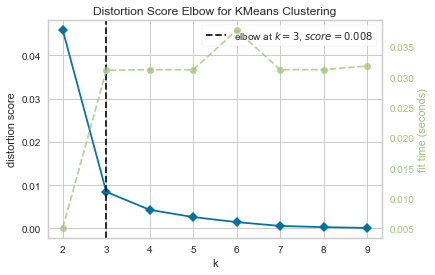

In [108]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

berlin_grouped_clustering = doner.drop('Neighborhood', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(berlin_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()

#### According to the elbow rule, 3 clusters are to be formed:

In [109]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood:

In [110]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = df.drop("PostalCode", axis=1)

# merge berlin_grouped with df to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
berlin_merged = berlin_merged.join(doner.set_index('Neighborhood'), on='Neighborhood')

berlin_merged.head() # check the last columns!

,Borough,Neighborhood,Population_per_sqare_kilometer,Latitude,Longitude,Average monthly income in €,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Doner Restaurant
0,Mitte,Mitte,9.713,52.533216,13.359796,2025,0,Bakery,Supermarket,General Entertainment,Bar,Indie Movie Theater,Soccer Stadium,Café,Falafel Restaurant,Rock Club,Mediterranean Restaurant,0.000000
1,Mitte,Moabit,9.713,52.534679,13.334478,2025,2,Bar,Harbor / Marina,Café,Big Box Store,German Restaurant,Light Rail Station,Bakery,Park,Bus Stop,Doner Restaurant,0.083333
2,Mitte,Hansaviertel,9.713,52.519123,13.341872,2025,0,Café,Art Museum,Pedestrian Plaza,Currywurst Joint,Pastry Shop,Bistro,Boat or Ferry,Bus Stop,Rental Car Location,Convenience Store,0.000000
3,Mitte,Tiergarten,9.713,52.514375,13.336450,2025,0,Zoo Exhibit,Hotel,Waterfront,Restaurant,Flea Market,Monument / Landmark,German Restaurant,Canal Lock,History Museum,Historic Site,0.000000
4,Mitte,Wedding,9.713,52.550123,13.341970,2025,0,Gas Station,Ice Cream Shop,Food & Drink Shop,Bakery,Track,Big Box Store,Convenience Store,Tennis Court,Supermarket,Park,0.000000


In [94]:
berlin_merged = berlin_merged.dropna()

In [114]:
df_cluster_doner = berlin_merged[["Borough", "Neighborhood", "Doner Restaurant", "Cluster Labels", "Population_per_sqare_kilometer", "Average monthly income in €"]]
df_cluster_doner.head()

,Borough,Neighborhood,Doner Restaurant,Cluster Labels,Population_per_sqare_kilometer,Average monthly income in €
0,Mitte,Mitte,0.000000,0,9.713,2025
1,Mitte,Moabit,0.083333,2,9.713,2025
2,Mitte,Hansaviertel,0.000000,0,9.713,2025
3,Mitte,Tiergarten,0.000000,0,9.713,2025
4,Mitte,Wedding,0.000000,0,9.713,2025


Let's visualize the resulting clusters:

In [115]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhood'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

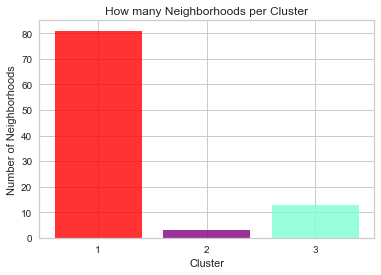

In [118]:
objects = (1,2,3)
y_pos = np.arange(len(objects))
performance = df_cluster_doner["Cluster Labels"].value_counts().to_frame().sort_index(ascending=True)
perf = performance["Cluster Labels"].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [119]:
# How many neighborhoods in each cluster
df_cluster_doner['Cluster Labels'].value_counts()

0    81
2    13
1     3
Name: Cluster Labels, dtype: int64

As we can see, cluster 1 contains by far the most neighborhoods.

## Let's now look a little deeper into the individual clusters: 

### Cluster 1

In [128]:
df_cluster1 = berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]
df_cluster1

,Neighborhood,Average monthly income in €,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Doner Restaurant
0,Mitte,2025,0,Bakery,Supermarket,General Entertainment,Bar,Indie Movie Theater,Soccer Stadium,Café,Falafel Restaurant,Rock Club,Mediterranean Restaurant,0.000000
2,Hansaviertel,2025,0,Café,Art Museum,Pedestrian Plaza,Currywurst Joint,Pastry Shop,Bistro,Boat or Ferry,Bus Stop,Rental Car Location,Convenience Store,0.000000
3,Tiergarten,2025,0,Zoo Exhibit,Hotel,Waterfront,Restaurant,Flea Market,Monument / Landmark,German Restaurant,Canal Lock,History Museum,Historic Site,0.000000
4,Wedding,2025,0,Gas Station,Ice Cream Shop,Food & Drink Shop,Bakery,Track,Big Box Store,Convenience Store,Tennis Court,Supermarket,Park,0.000000
5,Gesundbrunnen,2025,0,Drugstore,Clothing Store,Bakery,Trail,Mobile Phone Shop,Bookstore,Platform,Fast Food Restaurant,Soccer Field,Italian Restaurant,0.017544
6,Friedrichshain,2075,0,Coffee Shop,Café,Ice Cream Shop,Middle Eastern Restaurant,Bagel Shop,Record Shop,Pub,Italian Restaurant,Hostel,Bookstore,0.016129
7,Kreuzberg,2075,0,Café,Italian Restaurant,Coffee Shop,Bar,Nightclub,Kebab Restaurant,German Restaurant,Waterfront,Canal,Seafood Restaurant,0.000000
8,Prenzlauer Berg,2550,0,Café,Cocktail Bar,Beer Bar,Falafel Restaurant,Organic Grocery,Park,Coffee Shop,Sushi Restaurant,Karaoke Bar,French Restaurant,0.000000
9,Weißensee,2550,0,Lake,Hotel,German Restaurant,Park,Vietnamese Restaurant,Beach,Tram Station,Zoo Exhibit,Fish Market,Fast Food Restaurant,0.000000
10,Blankenburg,2550,0,Bus Stop,Furniture / Home Store,Supermarket,Light Rail Station,Bakery,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,0.000000


### Cluster 2

In [129]:
df_cluster2 = berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]
df_cluster2

,Neighborhood,Average monthly income in €,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Doner Restaurant
12,Karow,2550,1,Supermarket,Doner Restaurant,Drugstore,Light Rail Station,Zoo Exhibit,Farmers Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop,0.20
50,Lichtenrade,2200,1,Supermarket,Photography Studio,Doner Restaurant,Light Rail Station,Zoo Exhibit,Farm,Food Truck,Food Court,Food & Drink Shop,Flower Shop,0.25
68,Grünau,2275,1,Italian Restaurant,Hotel,Doner Restaurant,Other Repair Shop,Zoo Exhibit,Farmers Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop,0.25


### Cluster 3

In [130]:
df_cluster3 = berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]
df_cluster3

,Neighborhood,Average monthly income in €,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Doner Restaurant
1,Moabit,2025,2,Bar,Harbor / Marina,Café,Big Box Store,German Restaurant,Light Rail Station,Bakery,Park,Bus Stop,Doner Restaurant,0.083333
21,Charlottenburg,2250,2,Vietnamese Restaurant,Café,Italian Restaurant,Korean Restaurant,Gym / Fitness Center,Bar,Vegetarian / Vegan Restaurant,Doner Restaurant,Cocktail Bar,French Restaurant,0.036364
22,Wilmersdorf,2250,2,Bakery,Supermarket,Doner Restaurant,Hotel,Italian Restaurant,Vietnamese Restaurant,Burger Joint,Bavarian Restaurant,Thai Restaurant,Bus Stop,0.050000
27,Halensee,2250,2,Ice Cream Shop,Plaza,Bakery,Automotive Shop,Park,Steakhouse,Scenic Lookout,Gas Station,Light Rail Station,Pub,0.050000
37,Steglitz,2500,2,Sushi Restaurant,Doner Restaurant,Café,Martial Arts School,Indoor Play Area,Bookstore,Burger Joint,Chinese Restaurant,Clothing Store,Coffee Shop,0.066667
40,Zehlendorf,2500,2,Café,Bank,Italian Restaurant,Thai Restaurant,Bagel Shop,Light Rail Station,Steakhouse,Supermarket,Sushi Restaurant,Fast Food Restaurant,0.038462
45,Schöneberg,2200,2,Café,Supermarket,Pub,Park,Bus Stop,Doner Restaurant,Italian Restaurant,Restaurant,Bistro,Drugstore,0.041667
54,Rudow,1875,2,Supermarket,Department Store,Doner Restaurant,Metro Station,Drugstore,Bank,Italian Restaurant,Ice Cream Shop,Dive Bar,Fast Food Restaurant,0.111111
56,Alt-Treptow,2275,2,Café,Playground,Shoe Store,Big Box Store,Boat or Ferry,Dessert Shop,Snack Place,Bus Stop,Seafood Restaurant,Tapas Restaurant,0.043478
65,Köpenick,2275,2,Clothing Store,Drugstore,Gym / Fitness Center,Indian Restaurant,Tram Station,Bookstore,Sporting Goods Shop,Food Court,German Restaurant,Toy / Game Store,0.055556


Now let's see how many Doner restaurants there are in each cluster on average:

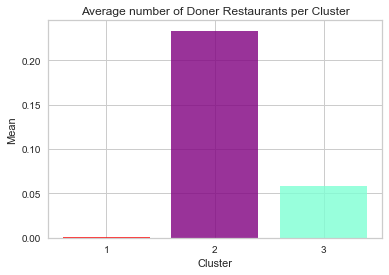

In [131]:
clusters_mean = [df_cluster1['Doner Restaurant'].mean(),df_cluster2['Doner Restaurant'].mean(),df_cluster3['Doner Restaurant'].mean()]
objects = (1,2,3)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Doner Restaurants per Cluster')

plt.show()

As we can see, Cluster 2 is the cluster with the most Doner restaurants.

## Extended clustering

Let us now include some more variables in the analysis for a renewed clustering: **Population per sqare kilometer** and **average income**.
The data used are only available at the borough level and are always assigned to all neighborhoods in a borough in the same way.

In [133]:
df_cluster2 = df_cluster_doner.drop("Cluster Labels", axis =1)
df_cluster2.head()

,Borough,Neighborhood,Doner Restaurant,Population_per_sqare_kilometer,Average monthly income in €
0,Mitte,Mitte,0.000000,9.713,2025
1,Mitte,Moabit,0.083333,9.713,2025
2,Mitte,Hansaviertel,0.000000,9.713,2025
3,Mitte,Tiergarten,0.000000,9.713,2025
4,Mitte,Wedding,0.000000,9.713,2025


In [134]:
df_cluster_doner2 = df_cluster_doner.drop(["Cluster Labels", "Borough", "Neighborhood"], axis =1)
df_cluster_doner2.head()

,Doner Restaurant,Population_per_sqare_kilometer,Average monthly income in €
0,0.000000,9.713,2025
1,0.083333,9.713,2025
2,0.000000,9.713,2025
3,0.000000,9.713,2025
4,0.000000,9.713,2025


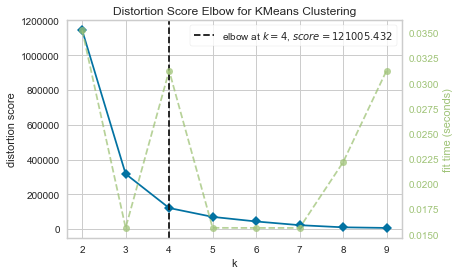

In [135]:
# Elbow-Method again:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_cluster_doner2)        # Fit the data to the visualizer
visualizer.show()

So, k=4 should be a good choice....

Now let's do some clustering again:

In [136]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster_doner2)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [138]:
df_cluster2["Cluster Labels"] = kmeans.labels_
df_cluster2.head()

,Borough,Neighborhood,Doner Restaurant,Population_per_sqare_kilometer,Average monthly income in €,Cluster Labels
0,Mitte,Mitte,0.000000,9.713,2025,0
1,Mitte,Moabit,0.083333,9.713,2025,0
2,Mitte,Hansaviertel,0.000000,9.713,2025,0
3,Mitte,Tiergarten,0.000000,9.713,2025,0
4,Mitte,Wedding,0.000000,9.713,2025,0


In [157]:
berlin_merged2 = df[["Neighborhood","Latitude", "Longitude"]]

# merge berlin_grouped with df to add latitude/longitude for each neighborhood
berlin_merged2 = berlin_merged2.join(df_cluster2.set_index('Neighborhood'), on='Neighborhood')

berlin_merged2.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Borough,Doner Restaurant,Population_per_sqare_kilometer,Average monthly income in €,Cluster Labels
0,Mitte,52.533216,13.359796,Mitte,0.000000,9.713,2025,0
1,Moabit,52.534679,13.334478,Mitte,0.083333,9.713,2025,0
2,Hansaviertel,52.519123,13.341872,Mitte,0.000000,9.713,2025,0
3,Tiergarten,52.514375,13.336450,Mitte,0.000000,9.713,2025,0
4,Wedding,52.550123,13.341970,Mitte,0.000000,9.713,2025,0


In [164]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged2['Latitude'], berlin_merged2['Longitude'], berlin_merged2['Neighborhood'], berlin_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

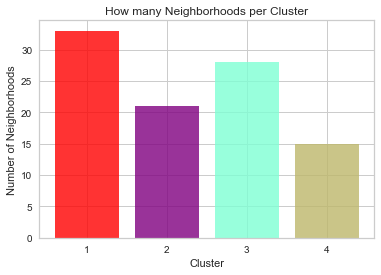

In [139]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = df_cluster2["Cluster Labels"].value_counts().to_frame().sort_index(ascending=True)
perf = performance["Cluster Labels"].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [147]:
df_cl1 = df_cluster2.loc[df_cluster2['Cluster Labels'] == 0]
df_cl2 = df_cluster2.loc[df_cluster2['Cluster Labels'] == 1]
df_cl3 = df_cluster2.loc[df_cluster2['Cluster Labels'] == 2]
df_cl4 = df_cluster2.loc[df_cluster2['Cluster Labels'] == 3]

In [148]:
df_cl1.head()

,Borough,Neighborhood,Doner Restaurant,Population_per_sqare_kilometer,Average monthly income in €,Cluster Labels
0,Mitte,Mitte,0.000000,9.713,2025,0
1,Mitte,Moabit,0.083333,9.713,2025,0
2,Mitte,Hansaviertel,0.000000,9.713,2025,0
3,Mitte,Tiergarten,0.000000,9.713,2025,0
4,Mitte,Wedding,0.000000,9.713,2025,0


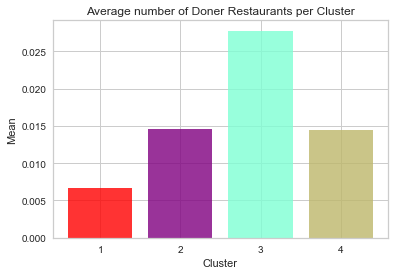

In [149]:
clusters_mean = [df_cl1['Doner Restaurant'].mean(),df_cl2['Doner Restaurant'].mean(),df_cl3['Doner Restaurant'].mean(),df_cl4['Doner Restaurant'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Doner Restaurants per Cluster')

plt.show()

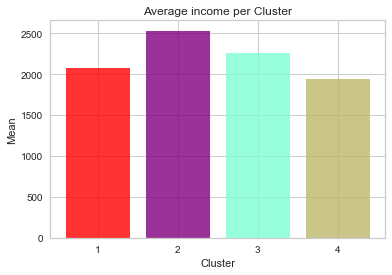

In [150]:
clusters_mean = [df_cl1['Average monthly income in €'].mean(),df_cl2['Average monthly income in €'].mean(),df_cl3['Average monthly income in €'].mean(),df_cl4['Average monthly income in €'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average income per Cluster')

plt.show()

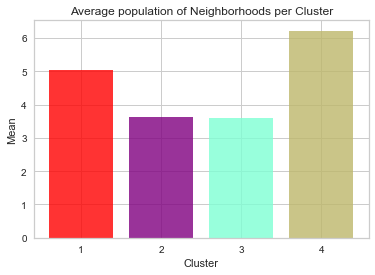

In [151]:
clusters_mean = [df_cl1['Population_per_sqare_kilometer'].mean(),df_cl2['Population_per_sqare_kilometer'].mean(),df_cl3['Population_per_sqare_kilometer'].mean(),df_cl4['Population_per_sqare_kilometer'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average population of Neighborhoods per Cluster')

plt.show()

## Analysis of the results

Cluster three has the most kebab restaurants and is excluded from further consideration due to the competitive situation in this cluster. Clusters 2 and 4 have about the same number of kebab restaurants and cluster 1 the least.
Accordingly, cluster 1 is considered further.
Cluster 1 has a medium average income, which fits well with kebab restaurants. In addition, the population density in cluster 1 is the highest, which speaks for a potentially good occupancy rate of a new kebab restaurant in one of these neighborhoods.

Now let's have a deeper look into the Neigborhoods in Cluster 1:

In [159]:
df_cl1.shape

(33, 6)

In [163]:
df_cl1

,Borough,Neighborhood,Doner Restaurant,Population_per_sqare_kilometer,Average monthly income in €,Cluster Labels
0,Mitte,Mitte,0.000000,9.713,2025,0
1,Mitte,Moabit,0.083333,9.713,2025,0
2,Mitte,Hansaviertel,0.000000,9.713,2025,0
3,Mitte,Tiergarten,0.000000,9.713,2025,0
4,Mitte,Wedding,0.000000,9.713,2025,0
5,Mitte,Gesundbrunnen,0.017544,9.713,2025,0
6,Friedrichshain-Kreuzberg,Friedrichshain,0.016129,14.374,2075,0
7,Friedrichshain-Kreuzberg,Kreuzberg,0.000000,14.374,2075,0
28,Spandau,Spandau,0.024390,2.671,2050,0
29,Spandau,Haselhorst,0.000000,2.671,2050,0


Let us now sort the list from cluster 1 by number of kebab restaurants, population density, and income to derive a recommendation for a suitable location.

In [162]:
df_cl1.sort_values(['Doner Restaurant', 'Population_per_sqare_kilometer', 'Average monthly income in €'], ascending=[True, False, False])

,Borough,Neighborhood,Doner Restaurant,Population_per_sqare_kilometer,Average monthly income in €,Cluster Labels
7,Friedrichshain-Kreuzberg,Kreuzberg,0.000000,14.374,2075,0
0,Mitte,Mitte,0.000000,9.713,2025,0
2,Mitte,Hansaviertel,0.000000,9.713,2025,0
3,Mitte,Tiergarten,0.000000,9.713,2025,0
4,Mitte,Wedding,0.000000,9.713,2025,0
71,Marzahn-Hellersdorf,Marzahn,0.000000,4.434,2100,0
72,Marzahn-Hellersdorf,Biesdorf,0.000000,4.434,2100,0
73,Marzahn-Hellersdorf,Kaulsdorf,0.000000,4.434,2100,0
74,Marzahn-Hellersdorf,Mahlsdorf,0.000000,4.434,2100,0
75,Marzahn-Hellersdorf,Hellersdorf,0.000000,4.434,2100,0


As we can see in the sorted list (sorted by number of kebab restaurants, population density and income), Kreuzberg should be a suitable choice for a new kebab restaurant.